In [1]:
import pandas as pd
import numpy as np
import requests as re
import os
import tweepy
import json
import time
import datetime
import random
import csv

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

#load the given dataset

twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

twitter_enhanced.shape

(2356, 17)

In [2]:
images = pd.read_csv('image_predictor.tsv', sep = '\t')

images.shape

(2075, 12)

In [3]:
#import tweepy
#from tweepy import OAuthHandler
#
#from timeit import default_timer as timer

#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


# Fetch tweets from the twitter API using the following loop:
#list_of_tweets = []
# Tweets that can't be found are saved in the list below:
#cant_find_tweets_for_those_ids = []

#for tweet_id in df_tw['tweet_id']:   
#    try:
#        list_of_tweets.append(api.get_status(tweet_id))
#    except Exception as e:
#        cant_find_tweets_for_those_ids.append(tweet_id)
        

#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list
#my_list_of_dicts = []
#for each_json_tweet in list_of_tweets:
#    my_list_of_dicts.append(each_json_tweet._json)
    
#We write this list into a txt file
#with open('tweet_json.txt', 'w') as file:
#        file.write(json.dumps(my_list_of_dicts, indent=4))

In [3]:
## To increase the IOPub data rate, enter the following in your terminal
## jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

import json

with open('tweet-json1.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

status = pd.DataFrame.from_records(status)
status.shape

(2354, 31)

In [3]:
## Extract Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv,
##for use during the assessment phase.

# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open('tweet-json1.txt', 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
statusX = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

statusX.head(10)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [4]:
statusX.shape

(2354, 3)

In [8]:
##  Save to a csv file
statusX.to_csv('statusX.csv', index = False)

In [5]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [11]:
images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [10]:
statusX.columns

Index(['Tweet ID', 'Retweet Count', 'Favorite_Count'], dtype='object')

In [11]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
statusX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
## Select one record from each dataset 

tweet_sample = twitter_enhanced.iloc[5]
images_sample = images.iloc[3]


tweet_sample

tweet_id                                                     891087950875897856
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-29 00:08:17 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have a majestic great white breaching ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891087950...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [16]:
images_sample

tweet_id                                 666044226329800704
jpg_url     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
img_num                                                   1
p1                                      Rhodesian_ridgeback
p1_conf                                            0.408143
p1_dog                                                 True
p2                                                  redbone
p2_conf                                            0.360687
p2_dog                                                 True
p3                                       miniature_pinscher
p3_conf                                            0.222752
p3_dog                                                 True
Name: 3, dtype: object

In [7]:
## Make a copy of all three datasets

twitter_archive = twitter_enhanced.copy()
statusX2 = statusX.copy()
images2 = images.copy()

Here we are going to look through each dataset individually for any quality or tidiness issues


## Tweet archive

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> Data quality and tidiness issues noticed include:

- There are 78 replies and 181 retweets *(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id)*, therefore missing values issues
-The timestamp column and retweet status timestamp are in object format instead of date

In [20]:
print('Data Type for Timestamp :' + str(type(twitter_archive.timestamp[1])))

Data Type for Timestamp :<class 'str'>


In [21]:
## Find for duplicate values

print('Number of Duplicate Values in the dataset: {}'.format(twitter_archive.duplicated().sum()))

Number of Duplicate Values in the dataset: 0


In [22]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
twitter_archive.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None



First we look at the name column

In [25]:
twitter_archive.name.nunique()

957

In [26]:
twitter_archive.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [27]:
twitter_archive.name.value_counts().tail(30)

Linus         1
Shiloh        1
Gustav        1
Arlen         1
Lenox         1
Harvey        1
Blanket       1
Geno          1
Lilah         1
Stewie        1
Zoe           1
Gilbert       1
Rose          1
Theo          1
Fido          1
Emma          1
Spencer       1
Lilli         1
Boston        1
Brandonald    1
Corey         1
Leonard       1
Beckham       1
Devón         1
Gert          1
Dex           1
Ace           1
Tayzie        1
Grizzie       1
Christoper    1
Name: name, dtype: int64

A noticed pattern in this column is that some values are capitalized while some are not. Let's investigate further

In [8]:
# list all names that are NOT capitalized
small_letter_names = twitter_archive.name.str.contains('^[a-z]', regex = True)

twitter_archive[small_letter_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [31]:
len(twitter_archive[small_letter_names])

109

There are **109** instances of invalid entries in the **name** column

In [32]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


We see from above data summary the various **id** columns giving us various descriptive statistics tells us that all thos columns: **tweet_id**, **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, and **retweeted_status_user_id** should be **objects** instead of **integers**. Therefore we note this under our **"Data Quality and Tidiness Issues"**


### A look at the **"expanded_urls"**

In [34]:
## Find how many contain missing values as well as those without

print(twitter_archive.expanded_urls.isna().sum(), twitter_archive.expanded_urls.notnull().sum())

59 2297


In [38]:
## Find how many of the missing urls are replies or retweets

(twitter_archive.expanded_urls.isna() & (twitter_archive.in_reply_to_status_id.notnull() | \
                                         twitter_archive.retweeted_status_id.notnull())).sum()

56

In [9]:
## Find out which rows do not satisfy the avove condition

full_null = twitter_archive.expanded_urls.isna() & twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna()

twitter_archive[full_null][['tweet_id','text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


Of the 59 tweets with missing 'expanded_urls', 56 are either replies or retweets, leaving 3 as not being any of the either despite the fact that these 3 tweets (at 375, 707, and 1445) contain text.

Now we find if these tweets are in our **image prediction** or **retweets counts** datasets

In [10]:
## Find if they're in the image predictions dataset
culprit_ids = [828361771580813312,785515384317313025,696518437233913856]
images.tweet_id.isin(culprit_ids).sum()

0

In [12]:
## ## Find if they're in the retweets count dataset

statusX['tweet_id'].isin(culprit_ids).sum()

3

In [13]:
mark = statusX['tweet_id'].isin(culprit_ids)
statusX[mark]

,tweet_id,retweet_count,favorite_count
374,828361771580813312,195,2408
706,785515384317313025,1477,6800
1443,696518437233913856,1887,4274


Tweets with missing **"expanded_urls"** in the archive were also found in the retweets counts dataset

Next we look at the **rating_numerator** and **rating_denominator** columns

- From the descriptive summary of our twitter archive we see the maximum values in both columns can be considered outrageously huge. rating_numerator has a max value of 1776, while rating_denominator has a max value of 170. This is besides that there are clearly values in the numerator that are way larger than the denominator
- Let's look further

In [46]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [49]:
## How many rating_numerators are > 14, and <= 14

print(len(twitter_archive[twitter_archive['rating_numerator'] <= 14]))
print(len(twitter_archive[twitter_archive['rating_numerator'] > 14]))

2328
28


In [51]:
## A look at those with rating numerator less than or equal to 14

twitter_archive[twitter_archive['rating_numerator'] <= 14].sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1203,716285507865542656,NaN,NaN,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephanus. She stays woke. 12/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716285507...,12,10,Stephanus,None,None,None,None
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
832,768596291618299904,NaN,NaN,2016-08-24 23:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oakley and Charlie. They're convi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768596291...,12,10,Oakley,None,None,None,None
1670,682406705142087680,NaN,NaN,2015-12-31 03:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Patrick. He's a bigass pupper. 7/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682406705...,7,10,Patrick,None,None,pupper,None
2290,667171260800061440,NaN,NaN,2015-11-19 02:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,None,None,None,None
1721,680130881361686529,NaN,NaN,2015-12-24 21:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,None,None,None,None
1160,724004602748780546,NaN,NaN,2016-04-23 22:38:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luther. He saw a ghost. Spooked af. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,None,None,pupper,None
242,846153765933735936,NaN,NaN,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vixen. He really likes bananas. Steals...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846153765...,13,10,Vixen,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None


In [52]:
## ## A look at those with rating numerator greater than 14

twitter_archive[twitter_archive['rating_numerator'] > 14].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


There are 2328 tweets with the numerator rating less than or equal to 14, and 28 tweets with numerator rating greater than 14

In [50]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [53]:
print(len(twitter_archive[twitter_archive['rating_denominator'] == 10]))
print(len(twitter_archive[twitter_archive['rating_denominator'] != 10]))

2333
23


In [54]:
twitter_archive[twitter_archive['rating_denominator']== 10].sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2056,671357843010908160,NaN,NaN,2015-11-30 15:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Tfw she says hello from the other side. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671357843...,9,10,None,None,None,None,None
613,796865951799083009,NaN,NaN,2016-11-11 00:03:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He's just checking on you. Nifty ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450...,9,10,None,None,None,None,None
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
1858,675501075957489664,NaN,NaN,2015-12-12 02:23:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None
1752,678969228704284672,NaN,NaN,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678969228...,11,10,Lola,None,None,None,None
2135,670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,None,None
2178,669015743032369152,NaN,NaN,2015-11-24 04:52:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog right here guys. Doesn't bark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669015743...,10,10,None,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None


In [55]:
twitter_archive[twitter_archive['rating_denominator']!= 10].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


**"source"**

In [57]:
twitter_archive.source.value_counts().sort_index()

<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

2221 tweets were made off an **IPhone**, 33 via **Twitter Web Cleint**, 91 vai **Vine- Make a Scene** and 11 off **Tweetdeck**

**doggo**, **floofer**, **pupper**, and **puppo**

Use value_counts() to get a count of values in the four columns

In [58]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [60]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [61]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [62]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

## Image prediction dataset

In [63]:
images2.shape

(2075, 12)

In [64]:
images2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
images2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


A look at the various dog prediction columns: **p1_dog**, **p2_dog**, **p3_dog** 

In [66]:
images2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [67]:
images2.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [68]:
images2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [69]:
# check out entries where are dog prediction columns all predicted false

images2[~images2.p1_dog & \
               ~images2.p2_dog & \
               ~images2.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].sample(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
971,706593038911545345,four-poster,False,quilt,False,pillow,False
870,697881462549430272,washbasin,False,paper_towel,False,toilet_tissue,False
1367,761745352076779520,paddle,False,canoe,False,lakeside,False
98,667766675769573376,fire_engine,False,tow_truck,False,jeep,False
1946,862457590147678208,home_theater,False,studio_couch,False,barber_chair,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
353,672591271085670400,gondola,False,lifeboat,False,bassinet,False
365,672898206762672129,motor_scooter,False,bobsled,False,moped,False
785,690248561355657216,motor_scooter,False,moped,False,pickup,False
1755,824796380199809024,gas_pump,False,harvester,False,swing,False


In [71]:
len(images2[~images2.p1_dog & ~images2.p2_dog & ~images2.p3_dog])

324

In each of the dog predictions columns, there were at least **500** instances that returned a "False" prediction, and **324** of these returned "False" in all three prediction columns

## json data

In [72]:
statusX2.head(10)

,Tweet ID,Retweet Count,Favorite_Count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Summary of Quality and Tidiness issues in the three datasets

### Data Quality

#### Twitter Archive
- There are only 181 retweets
- There are only 78 tweet replies
- There are missing values in the "expanded_urls" column
-  **timestamp** and **retweeted_status_timestamp** are in **object** format instead of **Date**
- Some values in the **name** column are represented as **'the'**, **'a'**, **'an'**, **'None'** etc
- Extract the actual source of tweets from the **source** column
- Clean up instances where the ratings denominator is not 10
- Set a threshold to decide which ratings numerator to drop

#### Image prediction
- There are 2075 predictions in the dataset, which suggests that some tweets in the Twitter Archive data may be clssified as missing data


### Data Tidiness

#### Twitter Archive
- Some entries in some columns are given as **'None'** as opposed to actual missing values **NaN**, especially **name**, **doggo**, **floofer**, **pupper**, and **puppo** columns
- Since we are only interested in "original tweets", columns for retweets and replies will be dropped

*****************************************************************************************************************************

## Clean Data


### 1. Drop retweets and replies

> We are directed to ignore the retweets and replies and focus on the 'original tweet'.

### Code

In [14]:
## Determine number of rows with retweets
display('****NUMBER OF ROWS WITH RETWEET******')
twitter_archive.retweeted_status_id.notnull().sum()

'****NUMBER OF ROWS WITH RETWEET******'

181

In [15]:
## Filter out the retweets
twitter_archive2 = twitter_archive[twitter_archive.retweeted_status_id.isna()]
twitter_archive2.shape[0]

2175

In [16]:
## Determine number of rows with replies
display('****NUMBER OF ROWS WITH REPLIES******')
twitter_archive.in_reply_to_status_id.notnull().sum()

'****NUMBER OF ROWS WITH REPLIES******'

78

In [17]:
## Filter out the replies
twitter_archive2 = twitter_archive2[twitter_archive2.in_reply_to_status_id.isna()]
twitter_archive2.shape[0]

2097

#### Test

In [80]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

> Drop every column relating to **retweets** and **replies**

> - **Code**

In [18]:
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                   'retweeted_status_user_id', 'retweeted_status_timestamp']

twitter_archive2 = twitter_archive2.drop(drop_columns, axis = 1)

> - **Test**

In [19]:
twitter_archive2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

> Change the data type of the **timestamp** column to date

> - **Code**

In [20]:
twitter_archive2['timestamp'] = pd.to_datetime(twitter_archive2['timestamp'])
twitter_archive2['timestamp'] = twitter_archive2.timestamp.dt.floor('s')

> - #### **Test**

In [21]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

> Extract the tweet source from the HTML link in the **source** column

> - **Code**

In [87]:
twitter_archive2.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
twitter_archive2['source'] = twitter_archive2['source'].str.extract('^<a.+>(.+)</a>$')

> - **Test**

In [23]:
twitter_archive2.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

> - Clean up the **rating_numerator** and **rating_denominator** columns

> - **Code**

In [92]:
twitter_archive2.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
420       1
204       1
165       1
144       1
121       1
99        1
88        1
84        1
80        1
75        1
60        1
50        1
45        1
44        1
27        1
26        1
24        1
14       38
13      287
12      486
11      413
10      436
9       153
8        98
7        52
6        32
5        34
4        16
3        19
2         9
1         5
0         1
Name: rating_numerator, dtype: int64

In [24]:
## Filter out rows with rating numerator greater than 14 and rating denominator less than and greater than 10

twitter_archive2 = twitter_archive2[twitter_archive2['rating_numerator'] <= 14]

twitter_archive2 = twitter_archive2[twitter_archive2['rating_denominator'] == 10]

twitter_archive2.shape[0]

2075

> - **Test**

In [25]:
twitter_archive2.rating_numerator.value_counts().sort_index()

0       1
1       4
2       9
3      19
4      15
5      34
6      32
7      51
8      98
9     152
10    436
11    413
12    486
13    287
14     38
Name: rating_numerator, dtype: int64

In [26]:
twitter_archive2.rating_denominator.value_counts().sort_index()

10    2075
Name: rating_denominator, dtype: int64

> - Drop missing values from **"expanded_urls"** column

> - **Code**

In [27]:
twitter_archive2 = twitter_archive2[twitter_archive2.expanded_urls.notnull()]

> - **Test**

In [28]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   int64              
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   object             
 3   text                2072 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2072 non-null   int64              
 6   rating_denominator  2072 non-null   int64              
 7   name                2072 non-null   object             
 8   doggo               2072 non-null   object             
 9   floofer             2072 non-null   object             
 10  pupper              2072 non-null   object             
 11  puppo               2072 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

> - Clean up the **doggo**, **floofer**, **pupper** and **puppo** columns

> - **Code**

> - use *loc* function to add a new column **dog_category** to be made of instances of doggo, floofer, pupper or poppo as well as None. NaN will be used if not any of the previous. Then drop the previous columns


In [29]:
twitter_archive2.loc[twitter_archive2['doggo'] == 'doggo', 'dog_category'] = 'doggo'
twitter_archive2.loc[twitter_archive2['floofer'] == 'floofer', 'dog_category'] = 'floofer'
twitter_archive2.loc[twitter_archive2['pupper'] == 'pupper', 'dog_category'] = 'pupper'
twitter_archive2.loc[twitter_archive2['puppo'] == 'puppo', 'dog_category'] = 'puppo'

In [30]:
twitter_archive2.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_category
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


> - **Test**

In [31]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   int64              
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   object             
 3   text                2072 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2072 non-null   int64              
 6   rating_denominator  2072 non-null   int64              
 7   name                2072 non-null   object             
 8   doggo               2072 non-null   object             
 9   floofer             2072 non-null   object             
 10  pupper              2072 non-null   object             
 11  puppo               2072 non-null   object             
 12  dog_category        334 non-null  

In [32]:
twitter_archive2.dog_category.value_counts()

pupper     228
doggo       72
puppo       24
floofer     10
Name: dog_category, dtype: int64

In [33]:
twitter_archive2 = twitter_archive2.drop(['doggo', 'floofer','pupper', 'puppo'], axis = 1)

In [34]:
twitter_archive2['dog_category'] = twitter_archive2.dog_category.replace(np.nan, 'none')

In [35]:
twitter_archive2.dog_category.value_counts()

none       1738
pupper      228
doggo        72
puppo        24
floofer      10
Name: dog_category, dtype: int64

In [36]:
twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   int64              
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   object             
 3   text                2072 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2072 non-null   int64              
 6   rating_denominator  2072 non-null   int64              
 7   name                2072 non-null   object             
 8   dog_category        2072 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 161.9+ KB


> - Merge the **retweet_count** and **favorite_count** columns to the twitter archive table, joining on **tweet_id**

> - **Code**

In [112]:
statusX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tweet ID        2354 non-null   int64
 1   Retweet Count   2354 non-null   int64
 2   Favorite_Count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
clean_archive =  pd.merge(twitter_archive2, statusX2, 
                         on = 'tweet_id', how = 'left')

> - **Test**

In [38]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   int64              
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   object             
 3   text                2072 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2072 non-null   int64              
 6   rating_denominator  2072 non-null   int64              
 7   name                2072 non-null   object             
 8   dog_category        2072 non-null   object             
 9   retweet_count       2072 non-null   int64              
 10  favorite_count      2072 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 194.2+ KB


In [39]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,9774,41048


In [40]:
clean_archive.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,retweet_count,favorite_count
2067,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,none,41,111
2068,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,none,147,311
2069,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,none,47,128
2070,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,none,48,132
2071,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,none,532,2535


> - Clean up the **name** column. Replace all lowercase values with "NA"

> - **Code**

In [41]:
invalid_names = clean_archive.name.str.contains('^[a-z]', regex = True)

clean_archive[invalid_names].name.value_counts().sort_index()

a               54
actually         2
all              1
an               5
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [42]:
clean_archive.loc[invalid_names, 'name'] = "na"

> - **Test**

In [43]:
clean_archive[invalid_names].name.value_counts().sort_index()

na    101
Name: name, dtype: int64

> - Carry out some feature engineering in the Image Prediction dataset. Extract dog breeds and highest prediction confidence level from all the prediction columns where the prediction is true. Move the values to a new column(s).

> - **Code**

In [44]:
images2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
images2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
## Source: https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb


# setup the conditions for selection
conditions = [(images2['p1_dog'] == True),
              (images2['p2_dog'] == True),
              (images2['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [images2['p1'], 
                 images2['p2'],
                 images2['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [images2['p1_conf'], 
                      images2['p2_conf'], 
                      images2['p3_conf']]

# select the predicted breed based on the first successful condition
images2['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
images2['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [47]:
images2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


> - Merge the **breed** and **confidence** columns in the Image Prediction dataset to the clean twitter archive data

> - **Code**

In [48]:
# merge the breed and confidence columns to archive
cols = ['tweet_id', 'breed', 'confidence']
clean_archive = pd.merge(clean_archive, images2[cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
clean_archive['confidence'] = (clean_archive.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
#images2.drop(['breed', 'confidence'], axis = 1, inplace = True)

> - **Test**

In [49]:
clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,8853,39467,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,6514,33819,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,4328,25461,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,8964,42908,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,9774,41048,basset,55


In [50]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1949 non-null   int64              
 1   timestamp           1949 non-null   datetime64[ns, UTC]
 2   source              1949 non-null   object             
 3   text                1949 non-null   object             
 4   expanded_urls       1949 non-null   object             
 5   rating_numerator    1949 non-null   int64              
 6   rating_denominator  1949 non-null   int64              
 7   name                1949 non-null   object             
 8   dog_category        1949 non-null   object             
 9   retweet_count       1949 non-null   int64              
 10  favorite_count      1949 non-null   int64              
 11  breed               1949 non-null   object             
 12  confidence          1949 non-null 

> - Since the values in the **rating_denominator** column are all 10, we can drop the column and rename the **rating_numerator** as "rating"

> - **Code**

In [54]:
## Drop rating denominator column
clean_archive.drop('rating_denominator', axis = 1, inplace = True)

## Rename the rating numerator column
clean_archive.rename(columns = {'rating_numerator': 'rating'}, inplace = True)

> - **Test**

In [55]:
clean_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'dog_category', 'retweet_count', 'favorite_count', 'breed',
       'confidence'],
      dtype='object')

### Store the cleaned data

Store the cleaned dataset as a new CSV file titled 'twitter_archive_master.csv'

> - **Code**

In [56]:
clean_archive.to_csv('twitter_archive_master.csv', index = False)

## Analysis

In this section we would be analyzing the **twitter_archive_master.csv** dataset using descriptive statistics and visualizations

In [57]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1949 non-null   int64              
 1   timestamp       1949 non-null   datetime64[ns, UTC]
 2   source          1949 non-null   object             
 3   text            1949 non-null   object             
 4   expanded_urls   1949 non-null   object             
 5   rating          1949 non-null   int64              
 6   name            1949 non-null   object             
 7   dog_category    1949 non-null   object             
 8   retweet_count   1949 non-null   int64              
 9   favorite_count  1949 non-null   int64              
 10  breed           1949 non-null   object             
 11  confidence      1949 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(4), object(6)
memory usage: 190.3+ KB


In [58]:
clean_archive[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1949.000000,1949.000000,1949.000000,1949.000000
mean,10.538225,2784.492560,8972.254489,46.119548
std,2.174663,4709.940601,12313.964625,33.832153
min,0.000000,16.000000,81.000000,0.000000
25%,10.000000,624.000000,1957.000000,14.000000
50%,11.000000,1360.000000,4144.000000,46.000000
75%,12.000000,3240.000000,11416.000000,77.000000
max,14.000000,79515.000000,132810.000000,99.000000


### Distribution of Ratings

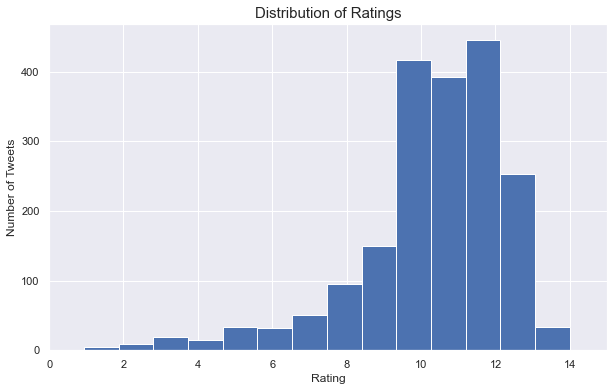

In [60]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (10, 6)

clean_archive['rating'].plot(kind = 'hist', bins = 15)


plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)
plt.title('Distribution of Ratings', fontsize = 15)
plt.show();

In [63]:
high_rating = (clean_archive['rating'] >= 9).sum()
high_rating_percent = ((high_rating * 100)/clean_archive.shape[0]).round()

print("Number of tweets with high rating:  {}".format(high_rating))
print("Percentage of tweets with high rating: {}%".format(round(high_rating_percent, 3)))

Number of tweets with high rating:  1690
Percentage of tweets with high rating: 87.0%


We see from the above plot that the distribution of the ratings is skewed to the left with ratings of between 9-14 making up approx. 87% of the distribution.

**Top 5 tweets with the most retweets, and most favorites**

In [64]:
clean_archive.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,breed,confidence
763,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,79515,131075,Labrador_retriever,82
395,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,none,56625,107015,Chihuahua,50
797,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,None,doggo,52360,75163,Eskimo_dog,50
306,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,48265,132810,Lakeland_terrier,19
58,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,Duddles,none,45849,107956,English_springer,38


In [65]:
clean_archive.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_category,retweet_count,favorite_count,breed,confidence
306,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,48265,132810,Lakeland_terrier,19
763,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,79515,131075,Labrador_retriever,82
58,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,Duddles,none,45849,107956,English_springer,38
395,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,none,56625,107015,Chihuahua,50
108,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,Jamesy,pupper,32883,106827,French_bulldog,90


We canb see from the result above that tweet with ID **744234799360020481** had the most retweets, while the tweet with ID **822872901745569793** was favorited the most.

**Breeds tweeted about the most**

In [66]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(clean_archive.breed == 'none')
none_perc = none_count * 100 / clean_archive.shape[0]
print(str.format(none_count, round(none_perc)))

Number of tweets with 'none' predicted breed:  302 (15%)


In [67]:
str = "Number of distinct breeds:  {}"
print(str.format(len(clean_archive.breed.unique())))

Number of distinct breeds:  113


In [84]:
top_breeds_count = clean_archive[clean_archive.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top_breeds_count)

#top_percent = (sum(top_breeds_count) * 100) / clean_archive[0].round()
#print("\nTop 10 dog breeds make up {}% of all tweets".format(top_percent))

Breed and number of tweets
--------------------------
golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              89
pug                    62
toy_poodle             50
chow                   47
Samoyed                42
Pomeranian             40
malamute               33
Name: breed, dtype: int64


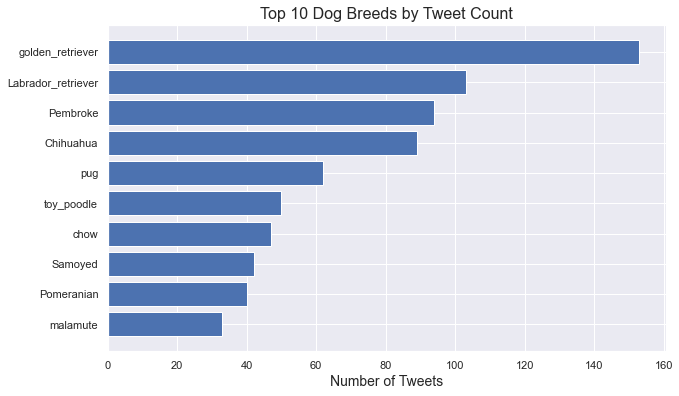

In [73]:
plt.barh(top_breeds_count.index, top_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

A quick glance at the above plot, we see that the Golden Retreiver, Labrador Retreiver, Pembroke, Chihuahua, and Bug are top 5 dog breeds tweeted about. 


**Bivariate Analysis**

Here we will take an exploratory look at the 4 important numeric variables: **rating**, **retweet_count**, **favorite_count**, **confidence**

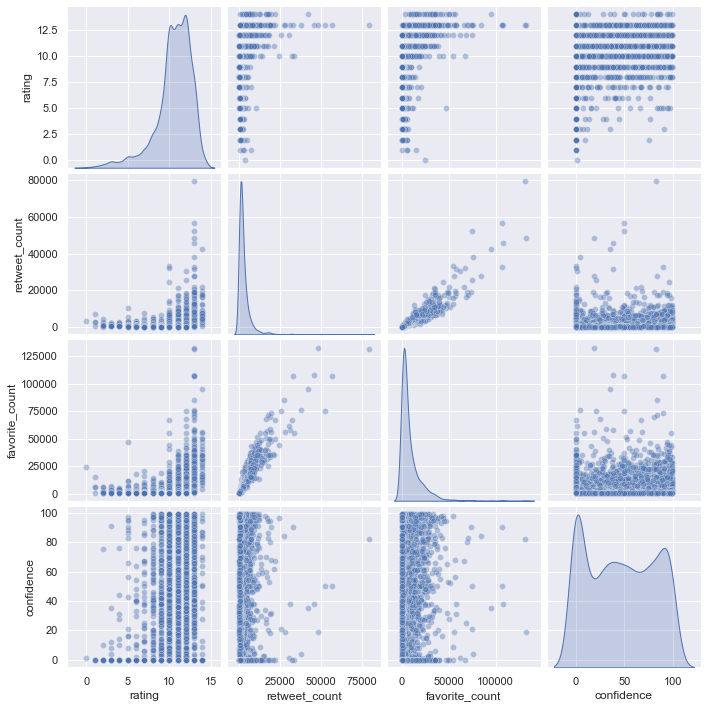

In [74]:
sns.pairplot(clean_archive, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.4});

### **Dog breeds with the most favorite counts**

In [75]:
fav_counts_breed = clean_archive[clean_archive.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1914145
Labrador_retriever    1253364
Pembroke              1038797
Chihuahua              717450
Samoyed                583906
French_bulldog         570921
chow                   443610
cocker_spaniel         407412
pug                    383817
toy_poodle             337270
Name: favorite_count, dtype: int64

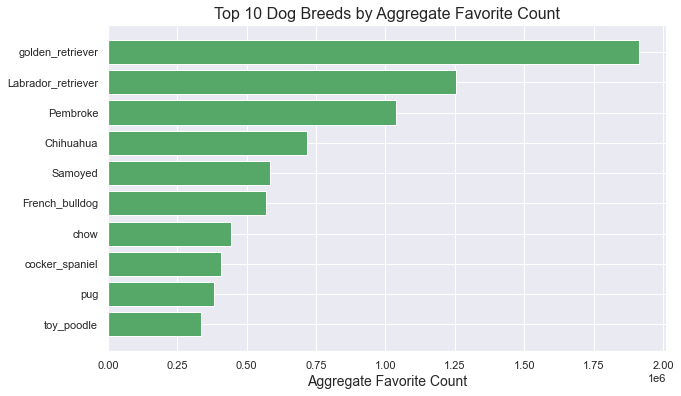

In [76]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The plot above shows the top 10 dog breeds ranked by aggregate favourite counts. It looks very similar to the barplot ealier of top 10 dog breeds ranked by tweet, and in fact the top 4 dog breeds are the same. This also makes sense, as these dogs have the highest number of tweets.

Both groups have these 8 dog breeds in common:

In [78]:
list(set(top_breeds_count.index) & set(top10_breeds_fav_counts.index))

['pug',
 'chow',
 'toy_poodle',
 'Samoyed',
 'golden_retriever',
 'Chihuahua',
 'Labrador_retriever',
 'Pembroke']

### Ratings distribution by Dog breed

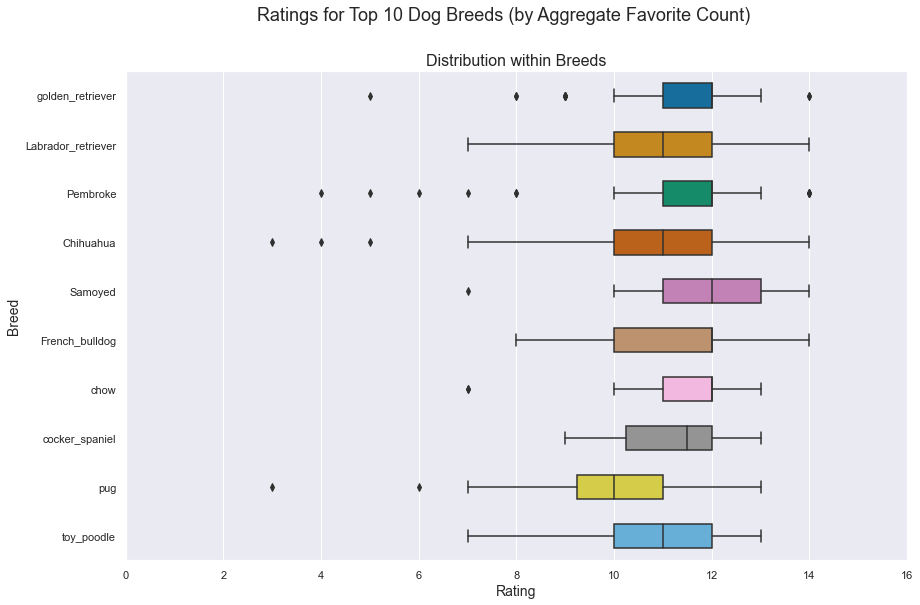

In [79]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = clean_archive,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()


### Daily dog breed distribution

In [80]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)


# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days


# start date
first_day = clean_archive.timestamp.min()


# array with days corresponding to timestamp
archive_days = (clean_archive.timestamp - first_day).apply(days_from_start)

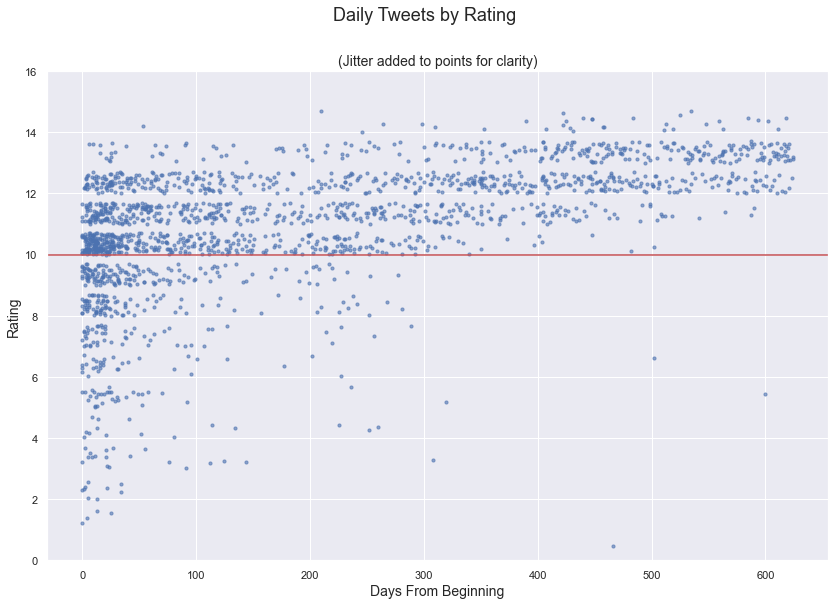

In [81]:
plt.figure(figsize = (14, 9))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = clean_archive.rating.apply(jitter)

plt.scatter(archive_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

The ratings increased as the days went on, and was mostly exceeding 10 from the 300day mark.

## Multivariate Analysis


### Relationship between favourite and retweet counts with dog rating as colour.

**Source**: https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb

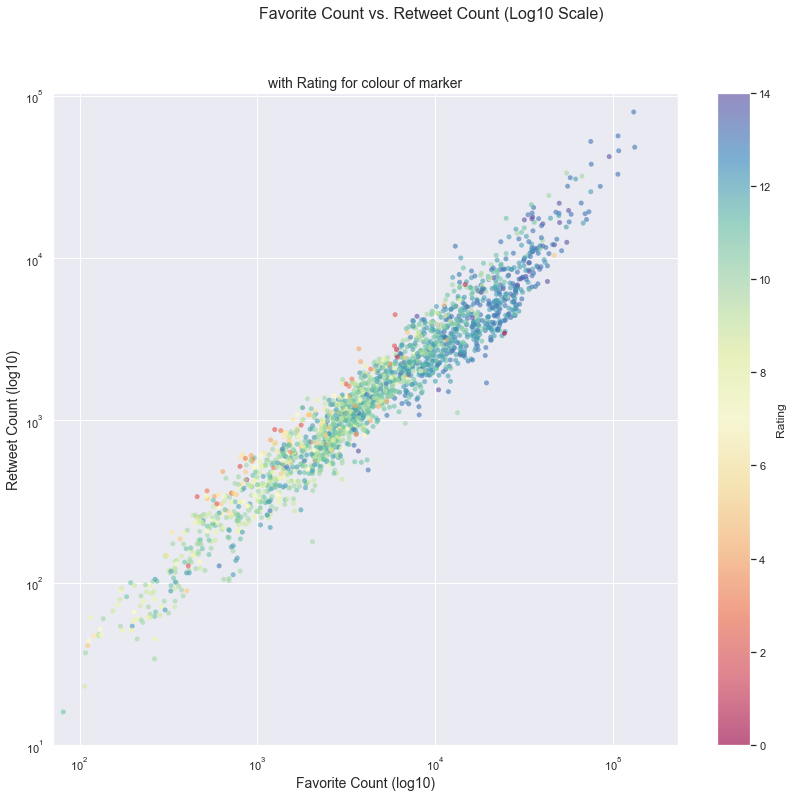

In [82]:

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(clean_archive['favorite_count'].min() - 10, clean_archive['favorite_count'].max() + 100000)
plt.ylim(10, clean_archive['retweet_count'].max() + 25000)
colours = clean_archive['rating']
markers = 25

plt.scatter(clean_archive['favorite_count'], clean_archive['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();


There are no surprises here as we clearly see a strong correlation between retweets count and favourites count. It also follows that tweets with high retweets and favorites also have high ratings.

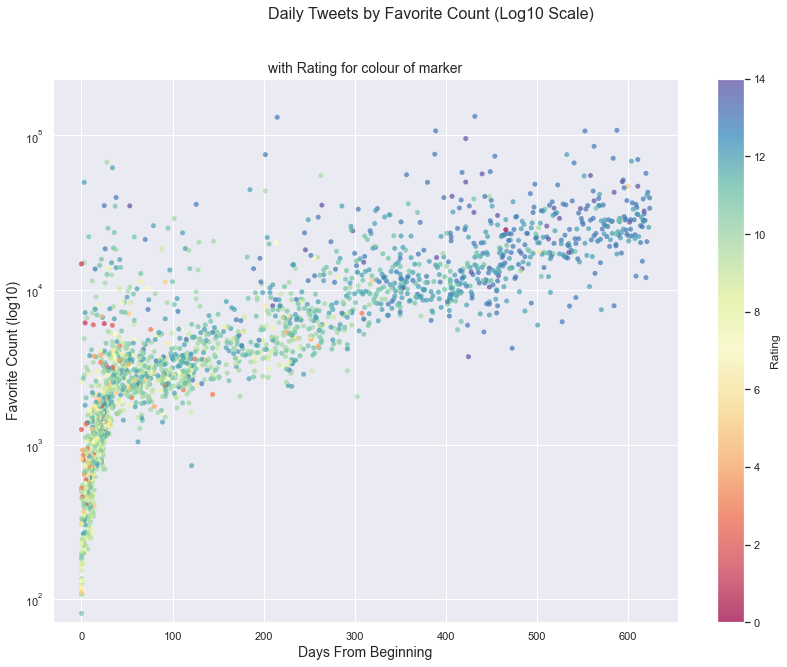

In [83]:
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(clean_archive['favorite_count'].min() - 10, 
         clean_archive['favorite_count'].max() + 100000)
colours = clean_archive['rating']
markers = 25

plt.scatter(archive_days, clean_archive['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

We also notice same pattern where retweets and favorites increase with the number of days since the original tweets. It also follows a pattern where tweets with the highest retweets and favorites all have high rating.